In [1]:
# Load python modules
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import tensorflow_datasets as tfds
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tqdm import tqdm  # Perform iterature with progress bar
import numpy as np
import PIL.Image
import PIL
import cv2
import os


In [2]:
#Class labelsb
class_names = ['Glass', 'Metal', 'Paper', 'Textile']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
image_size = (32, 32)

In [3]:
print('Number of classes:', nb_classes)

Number of classes: 4


In [4]:
def load_data():
    """
        Load the data from local folder
        
    """
    datasets = ['C:/Mani/Dataset/dataset1/train_ds',
               'C:/Mani/Dataset/dataset1/test_ds']
    
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, image_size) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [5]:
#Prepare dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Mani/Dataset/dataset1/train_ds


100%|███████████████████████████████████████████████████████████████████████████████| 270/270 [00:01<00:00, 208.02it/s]


Loading C:/Mani/Dataset/dataset1/test_ds


100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 187.47it/s]


In [6]:
#Check the training and testing image shape
train_images.shape, test_images.shape

((1080, 32, 32, 3), (200, 32, 32, 3))

In [7]:
# Shuffle only the training dataset
np.random.seed(321)
train_images, train_labels = shuffle(train_images, train_labels)

In [8]:
#Check the number of training dataset
print('No of training images:', train_images.shape[0])

No of training images: 1080


In [9]:
#Normalise train and test image dataset from 0,255 to 0,1
train_images = train_images / 255.0 
test_images = test_images / 255.0

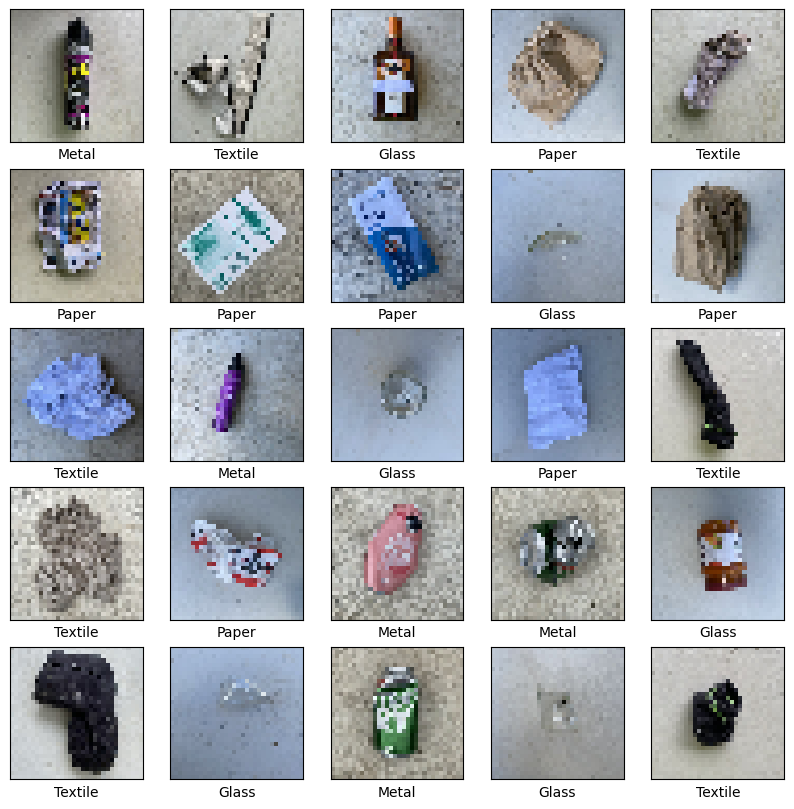

In [10]:
#Display 25 images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
#Sequential Model 1
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32, 32 ,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421,444 (1.61 MB)

 Trainable params: 421,444 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#Sequential Model 2 with image size 128, 128, 3
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
       
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 200,452 (783.02 KB)

 Trainable params: 200,452 (783.02 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Sequential Model 3 
# Build a deep model 
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Input((32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
       
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 2, 2, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 223,012 (871.14 KB)

 Trainable params: 223,012 (871.14 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Add callbacks to save the model weight with best accuracy during training
# import ModelCheckpoint package
# from tensorflow.keras.callbacks import ModelCheckpoint
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

checkpoint_filepath1 = 'C:/Mani/ModelCheckpoint/model1.keras'
model_checkpoint_callback1 = ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


checkpoint_filepath2 = 'C:/Mani/ModelCheckpoint/model2.keras'
model_checkpoint_callback2 = ModelCheckpoint(
    filepath=checkpoint_filepath2,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

checkpoint_filepath3 = 'C:/Mani/ModelCheckpoint/model3.keras'
model_checkpoint_callback3 = ModelCheckpoint(
    filepath=checkpoint_filepath3,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [15]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy', 
                metrics=['accuracy'])


model_2.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_3.compile(optimizer = tf.keras.optimizers.Adam(1e-3),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
               

In [16]:
# Set number of epochs
epochs = 100
batch_size = 64



In [17]:
#Model 1 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history1 = model_1.fit(train_images, train_labels,
                       batch_size=batch_size, epochs=epochs,
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback1])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_1_training_time', end_time - start_time )

Time model start: 2024-11-07 10:31:46.322928
Epoch 1/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2776 - loss: 1.4840
Epoch 1: val_accuracy improved from -inf to 0.26389, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.2776 - loss: 1.4764 - val_accuracy: 0.2639 - val_loss: 1.3708
Epoch 2/100
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3393 - loss: 1.3577
Epoch 2: val_accuracy improved from 0.26389 to 0.49074, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3488 - loss: 1.3543 - val_accuracy: 0.4907 - val_loss: 1.2944
Epoch 3/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4990 - loss: 1.2436
Epoch 3: val_accuracy improved from 0.49074 to 0.53241, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4961 - loss: 1.2408 - val_accuracy: 0.5324 - val_loss: 1.1337
Epoch 4/100
12/14 ━━━━━━━

Epoch 24/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8022 - loss: 0.5235
Epoch 24: val_accuracy improved from 0.70833 to 0.71759, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8036 - loss: 0.5200 - val_accuracy: 0.7176 - val_loss: 0.6657
Epoch 25/100
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8332 - loss: 0.4582
Epoch 25: val_accuracy improved from 0.71759 to 0.72685, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8310 - loss: 0.4604 - val_accuracy: 0.7269 - val_loss: 0.6572
Epoch 26/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8170 - loss: 0.4699
Epoch 26: val_accuracy improved from 0.72685 to 0.74074, saving model to C:/Mani/ModelCheckpoint/model1.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8185 - loss: 0.4682 - val_accuracy: 0.7407 - val_loss: 0.6472
Epoch 27/100
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accura

Epoch 48/100
12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9526 - loss: 0.1616
Epoch 48: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9534 - loss: 0.1602 - val_accuracy: 0.7778 - val_loss: 0.6665
Epoch 49/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9490 - loss: 0.1678
Epoch 49: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9496 - loss: 0.1670 - val_accuracy: 0.7778 - val_loss: 0.6603
Epoch 50/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9429 - loss: 0.1734
Epoch 50: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9443 - loss: 0.1716 - val_accuracy: 0.7917 - val_loss: 0.6405
Epoch 51/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9691 - loss: 0.1301
Epoch 51: val_accuracy did not improve from 0.80093
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9694 - loss: 0.1301 - val_accuracy: 0.7778

12/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9980 - loss: 0.0308
Epoch 98: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9972 - loss: 0.0315 - val_accuracy: 0.7639 - val_loss: 0.9104
Epoch 99/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9885 - loss: 0.0301
Epoch 99: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9888 - loss: 0.0300 - val_accuracy: 0.8056 - val_loss: 0.8868
Epoch 100/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9846 - loss: 0.0476
Epoch 100: val_accuracy did not improve from 0.81481
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9848 - loss: 0.0478 - val_accuracy: 0.7546 - val_loss: 1.0229
Time model end: 2024-11-07 10:32:34.971271
Model_1_training_time 0:00:48.648343


In [18]:
# Model 2 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)


history2 = model_2.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback2])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time) 
print('Model_2_training_time', end_time - start_time )

Time model start: 2024-11-07 10:32:34.981009
Epoch 1/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2655 - loss: 1.4017
Epoch 1: val_accuracy improved from -inf to 0.26852, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2673 - loss: 1.4007 - val_accuracy: 0.2685 - val_loss: 1.3819
Epoch 2/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2446 - loss: 1.3812
Epoch 2: val_accuracy improved from 0.26852 to 0.43056, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2437 - loss: 1.3809 - val_accuracy: 0.4306 - val_loss: 1.3657
Epoch 3/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4185 - loss: 1.3310
Epoch 3: val_accuracy improved from 0.43056 to 0.44444, saving model to C:/Mani/ModelCheckpoint/model2.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4169 - loss: 1.3260 - val_accuracy: 0.4444 - val_loss: 1.2441
Epoch 4/100
13/14 ━━━━━━━

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9303 - loss: 0.1920 - val_accuracy: 0.7824 - val_loss: 0.6417
Epoch 49/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9262 - loss: 0.2202
Epoch 49: val_accuracy did not improve from 0.79630
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9246 - loss: 0.2213 - val_accuracy: 0.7778 - val_loss: 0.6316
Epoch 50/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9370 - loss: 0.1826
Epoch 50: val_accuracy did not improve from 0.79630
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9365 - loss: 0.1849 - val_accuracy: 0.7685 - val_loss: 0.5951
Epoch 51/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9473 - loss: 0.1562
Epoch 51: val_accuracy did not improve from 0.79630
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9475 - loss: 0.1550 - val_accuracy: 0.7870 - val_loss: 0.6261
Epoch 52/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9463 - loss: 0.1521
Epoch 52: val_accuracy did not i

Epoch 74/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9724 - loss: 0.0815
Epoch 74: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9729 - loss: 0.0807 - val_accuracy: 0.8194 - val_loss: 0.7572
Epoch 75/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9726 - loss: 0.0686
Epoch 75: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9731 - loss: 0.0692 - val_accuracy: 0.8009 - val_loss: 0.7465
Epoch 76/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9843 - loss: 0.0472
Epoch 76: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.7963 - val_loss: 0.8152
Epoch 77/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9877 - loss: 0.0477
Epoch 77: val_accuracy did not improve from 0.83333
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9875 - loss: 0.0484 - val_accuracy: 0.8056

In [19]:
#Model 3 training
# Get the current time
start_time = datetime.now()
print('Time model start:', start_time)

history3 = model_3.fit(train_images, train_labels,
                       batch_size=batch_size, epochs= epochs, 
                       validation_split = 0.2, verbose=1,
                       callbacks=[model_checkpoint_callback3])

# Get the current time
end_time = datetime.now()
print('Time model end:', end_time)
print('Model_3_training_time', end_time - start_time )

Time model start: 2024-11-07 10:33:36.015847
Epoch 1/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2396 - loss: 1.3927
Epoch 1: val_accuracy improved from -inf to 0.23148, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.2394 - loss: 1.3930 - val_accuracy: 0.2315 - val_loss: 1.3867
Epoch 2/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2676 - loss: 1.3872
Epoch 2: val_accuracy improved from 0.23148 to 0.24537, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.2668 - loss: 1.3870 - val_accuracy: 0.2454 - val_loss: 1.3831
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2697 - loss: 1.3783
Epoch 3: val_accuracy improved from 0.24537 to 0.31944, saving model to C:/Mani/ModelCheckpoint/model3.keras
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2679 - loss: 1.3781 - val_accuracy: 0.3194 - val_loss: 1.3586
Epoch 4/100
14/14 ━━━━━━━

13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9477 - loss: 0.1529
Epoch 48: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9471 - loss: 0.1539 - val_accuracy: 0.7546 - val_loss: 0.8052
Epoch 49/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9514 - loss: 0.1504
Epoch 49: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9515 - loss: 0.1500 - val_accuracy: 0.7315 - val_loss: 0.9052
Epoch 50/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9672 - loss: 0.1004
Epoch 50: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9665 - loss: 0.1014 - val_accuracy: 0.7315 - val_loss: 1.1233
Epoch 51/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9215 - loss: 0.2057
Epoch 51: val_accuracy did not improve from 0.75463
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9235 - loss: 0.2015 - val_accuracy: 0.7269 - val_loss: 

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9836 - loss: 0.0492 - val_accuracy: 0.7222 - val_loss: 1.2255
Epoch 99/100
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9622 - loss: 0.1447
Epoch 99: val_accuracy did not improve from 0.76852
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9627 - loss: 0.1417 - val_accuracy: 0.7361 - val_loss: 0.9837
Epoch 100/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9797 - loss: 0.0903
Epoch 100: val_accuracy did not improve from 0.76852
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9794 - loss: 0.0904 - val_accuracy: 0.6806 - val_loss: 1.2606
Time model end: 2024-11-07 10:34:56.313613
Model_3_training_time 0:01:20.297766


Text(0.5, 1.0, 'Model_1 Accuracy (Exp:1.2)')

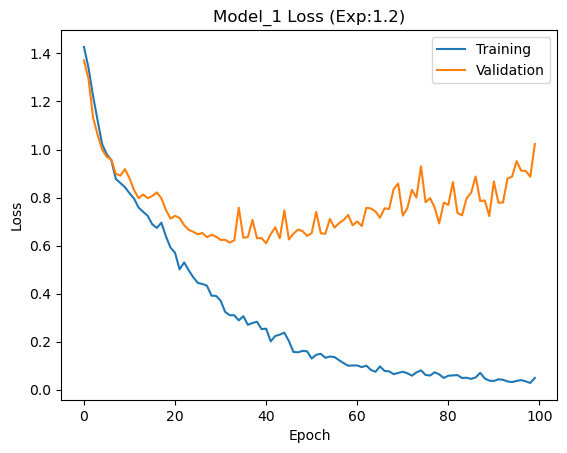

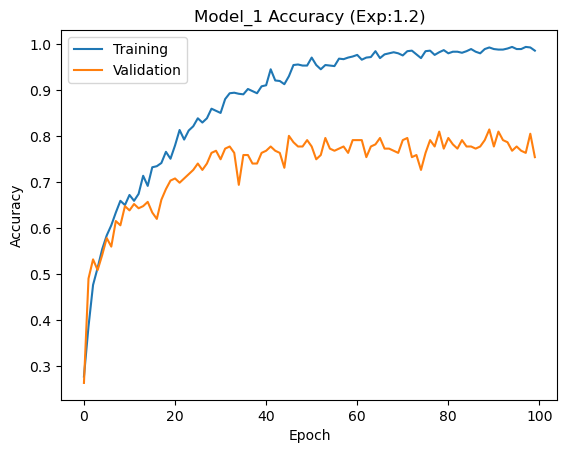

In [20]:

#Plot the training and validation loss
plt.figure()
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_1 Loss (Exp:1.2)')

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_1 Accuracy (Exp:1.2)')


Text(0.5, 1.0, 'Model_2 Accuracy (Exp:1.2)')

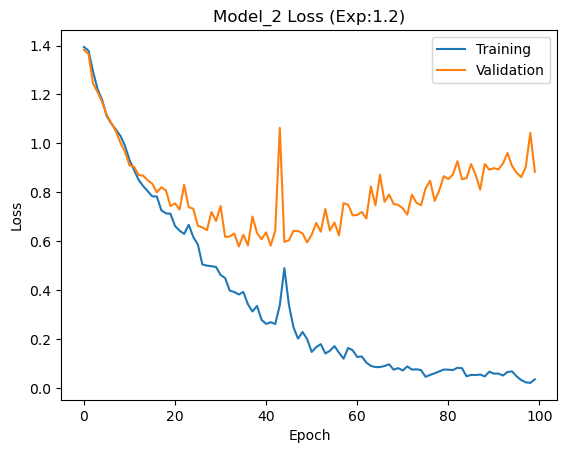

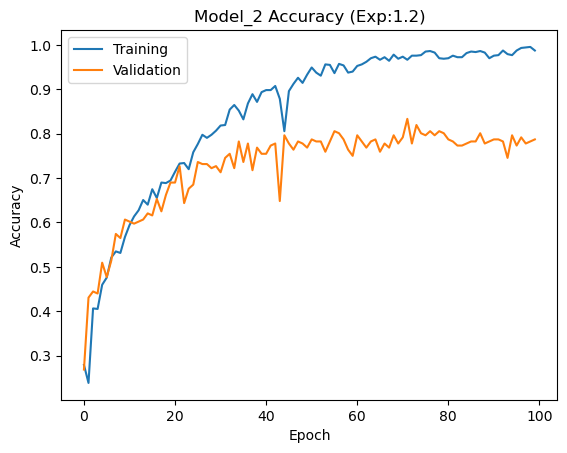

In [21]:
#Plot the training and validation loss
plt.figure()
plt.plot(history2.history['loss'], label='Training')
plt.plot(history2.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_2 Loss (Exp:1.2)')

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_2 Accuracy (Exp:1.2)')

Text(0.5, 1.0, 'Model_3 Accuracy (Exp:1.2)')

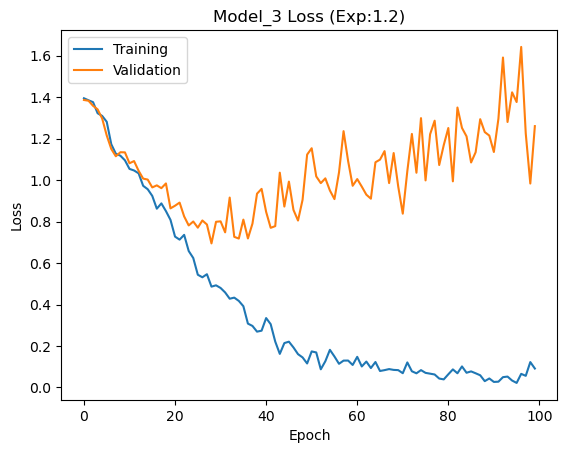

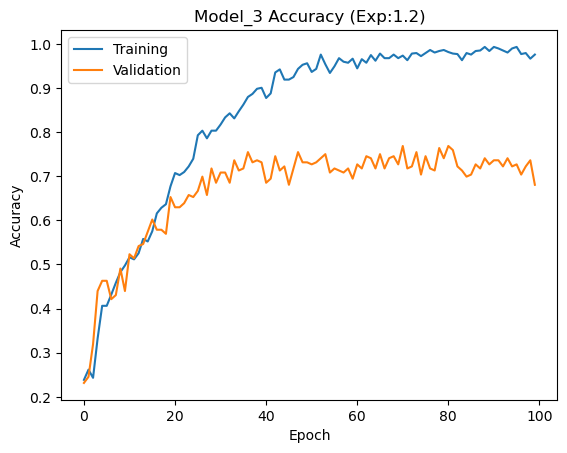

In [22]:
#Plot the training and validation loss
plt.figure()
plt.plot(history3.history['loss'], label='Training')
plt.plot(history3.history['val_loss'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model_3 Loss (Exp:1.2)')

#Plot the training and validation Accuracy
plt.figure()
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.legend(loc=0)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model_3 Accuracy (Exp:1.2)')

In [23]:
# Evaluate the test result for model 1, 2, 3
Test_result1 = model_1.evaluate(test_images, test_labels, batch_size = 32)

Test_result2 = model_2.evaluate(test_images, test_labels, batch_size = 64)

Test_result3 = model_3.evaluate(test_images, test_labels, batch_size = 64)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7547 - loss: 1.1331 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7887 - loss: 0.7317
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7624 - loss: 0.7596


In [24]:
predictions1 = model_1.predict(test_images)     # Vector of probabilities
pred_label1 = np.argmax(predictions1, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [25]:
predictions2 = model_2.predict(test_images)     # Vector of probabilities
pred_label2 = np.argmax(predictions2, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [26]:
predictions3 = model_3.predict(test_images)     # Vector of probabilities
pred_label3 = np.argmax(predictions3, axis = 1) # We take the highest probability

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


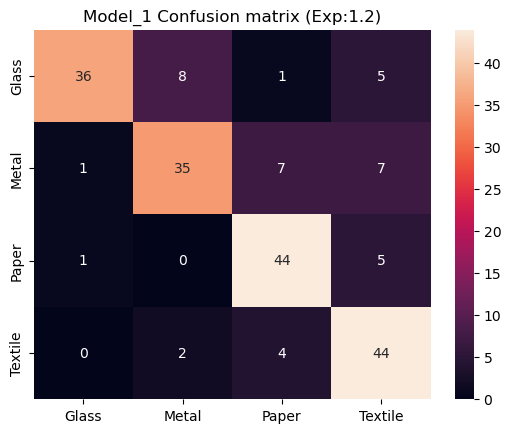

In [27]:
CM = confusion_matrix(test_labels, pred_label1)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_1 Confusion matrix (Exp:1.2)')
plt.show()

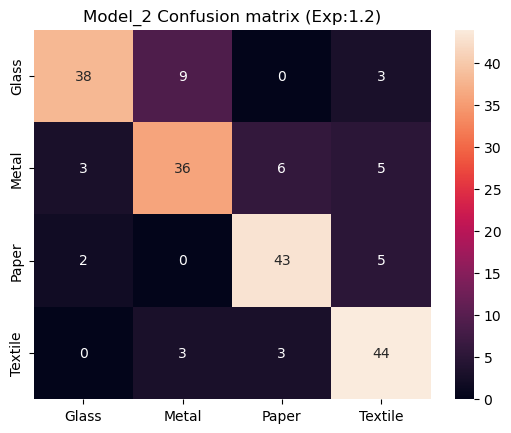

In [28]:
CM = confusion_matrix(test_labels, pred_label2)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_2 Confusion matrix (Exp:1.2)')
plt.show()


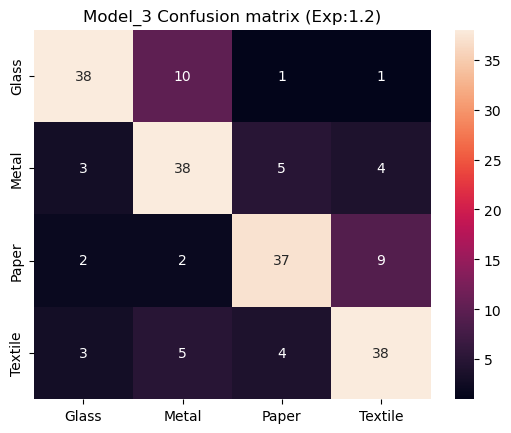

In [29]:
CM = confusion_matrix(test_labels, pred_label3)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Model_3 Confusion matrix (Exp:1.2)')
plt.show()
